# CODAB plot

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = Path(os.getenv("AA_DATA_DIR"))
GAUL_DIR = DATA_DIR / "public" / "raw" / "glb" / "asap" / "reference_data"
GAUL_ADM1_PATH = GAUL_DIR / "gaul1_asap_v04/gaul1_asap.shp"
GAUL_ADM0_PATH = GAUL_DIR / "gaul0_asap_v04/gaul0_asap.shp"
SAVE_DIR = DATA_DIR / "public" / "processed" / "nga" / "codab"

In [4]:
adm1 = gpd.read_file(GAUL_ADM1_PATH)
adm0 = gpd.read_file(GAUL_ADM0_PATH)

In [5]:
adm1

,asap1_id,name1,name1_shr,asap0_id,name0,name0_shr,km2_tot,km2_crop,km2_range,an_crop,an_range,water_lim,geometry
0,2434,Administrative unit not available,Unit unavailable,163,Kenya,Kenya,4065,208,22,1,0,0,"POLYGON ((34.00995 0.20986, 34.00978 0.20575, ..."
1,10047,No Name,No Name,185,Ethiopia,Ethiopia,3083,53,14,0,0,0,"POLYGON ((37.47740 12.29739, 37.48068 12.29768..."
2,627,Area under National Administration,Area under NA,148,Malawi,Malawi,22353,63,9,0,0,1,"POLYGON ((34.07776 -9.52866, 34.09209 -9.54323..."
3,2361,Lago niassa,Lago niassa,33,Mozambique,Mozambique,6882,6,7,0,0,1,"POLYGON ((34.91733 -11.89117, 34.91413 -11.891..."
4,2433,Administrative unit not available,Unit unavailable,163,Kenya,Kenya,7523,1,62,0,0,1,"POLYGON ((36.18642 4.45141, 36.18790 4.44634, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,10192,Kirundo,Kirundo,150,Burundi,Burundi,1774,1203,111,1,1,1,"POLYGON ((29.98240 -2.33542, 29.99806 -2.34384..."
2467,10207,Gisagara,Gisagara,179,Rwanda,Rwanda,674,610,0,1,0,1,"POLYGON ((29.96762 -2.44579, 29.96576 -2.45004..."
2468,10193,Makamba,Makamba,150,Burundi,Burundi,2457,325,401,1,1,1,"POLYGON ((29.78053 -4.01365, 29.78959 -4.00936..."
2469,10191,Kayanza,Kayanza,150,Burundi,Burundi,1179,999,65,1,1,0,"POLYGON ((29.66566 -2.79281, 29.65976 -2.80301..."


In [6]:
asap0_id = 155

In [7]:
asap1_ids = [1354, 1466, 1491]

In [8]:
adm1_nga = adm1[adm1["asap0_id"] == asap0_id]
adm1_bay = adm1[adm1["asap1_id"].isin(asap1_ids)]

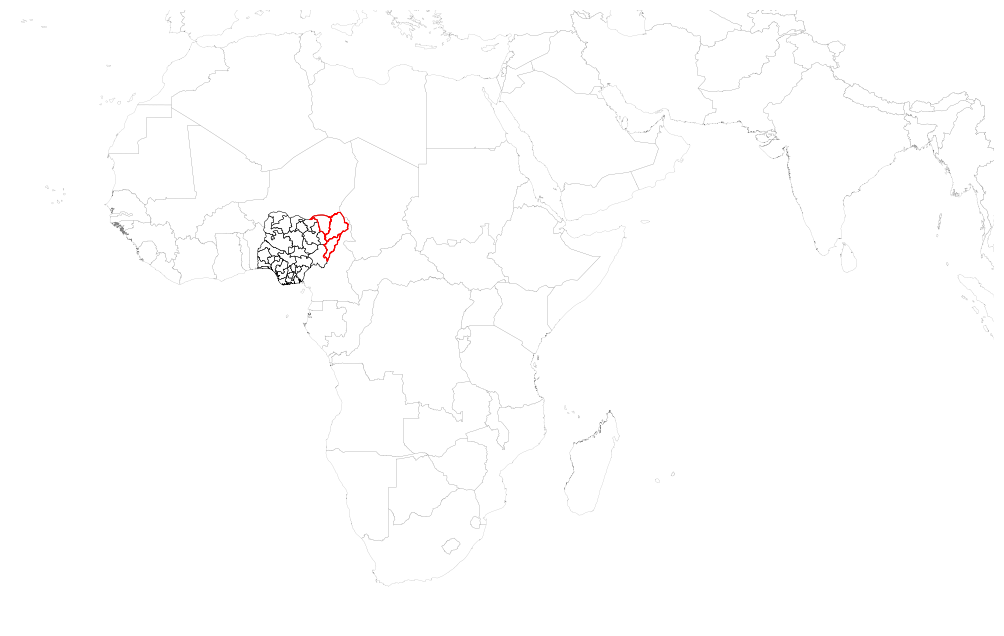

In [9]:
lon_min, lon_max = -30, 100
lat_min, lat_max = -40, 40
scale_factor = 0.1

fig, ax = plt.subplots(
    figsize=(
        (lon_max - lon_min) * scale_factor,
        (lat_max - lat_min) * scale_factor,
    )
)

adm0.boundary.plot(ax=ax, linewidth=0.1, color="grey")
adm1_nga.boundary.plot(ax=ax, linewidth=0.3, color="k")
adm1_bay.boundary.plot(ax=ax, linewidth=0.8, color="red")
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])
ax.axis("off")
filename = "bay_highlight.png"
plt.savefig(
    SAVE_DIR / filename, transparent=True, dpi=300, bbox_inches="tight"
)
plt.show()